In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
df=pd.read_csv('MLP CALL test FINAL Results.csv')
df

,[UNDERLYING_LAST],[DTE],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_IV],[C_LAST],[STRIKE],Call_BS,Call_MLP
0,179.02,1.649425,0.47056,0.00645,0.91520,-0.02033,1.08559,0.26887,18.55,195.0,20.895615,16.759176
1,179.02,1.649425,0.44009,0.00641,0.90725,-0.02019,1.02520,0.26711,16.70,200.0,18.986668,14.750557
2,179.02,1.649425,0.41070,0.00633,0.89419,-0.01936,0.96454,0.26497,14.95,205.0,17.174165,13.128058
3,179.02,1.649425,0.38230,0.00629,0.87701,-0.01918,0.90546,0.26478,13.60,210.0,15.664548,11.697142
4,179.02,1.649425,0.35522,0.00610,0.85580,-0.01888,0.84713,0.26322,12.55,215.0,14.150901,10.438192
...,...,...,...,...,...,...,...,...,...,...,...,...
83098,293.20,2.060274,0.18480,0.00260,1.12195,-0.01733,0.91873,0.24551,10.95,420.0,12.220778,8.622215
83099,293.20,2.060274,0.15494,0.00231,0.99964,-0.01550,0.77516,0.24797,6.00,440.0,10.053164,6.227463
83100,293.20,2.060274,0.08492,0.00159,0.65873,-0.00965,0.44507,0.23212,3.49,480.0,5.019698,3.561239
83101,293.20,2.060274,0.07622,0.00146,0.60341,-0.00848,0.39812,0.23210,2.85,490.0,4.428689,3.010648


In [8]:
df_S=df[df[' [DTE]']<0.1]

In [9]:
y_true=df_S[' [C_LAST]']
y_pred=df_S['Call_MLP']
print('MAE = ', mean_absolute_error(y_true, y_pred))
print('MSE = ', mean_squared_error(y_true, y_pred))
print('RMSE = ', mean_squared_error(y_true, y_pred, squared=False))

MAE =  1.7395856772126514
MSE =  12.789244484394015
RMSE =  3.576205319104877


In [10]:
df_M=df[df[' [DTE]'].between(0.1,0.5)]

In [11]:
y_true=df_M[' [C_LAST]']
y_pred=df_M['Call_MLP']
print('MAE = ', mean_absolute_error(y_true, y_pred))
print('MSE = ', mean_squared_error(y_true, y_pred))
print('RMSE = ', mean_squared_error(y_true, y_pred, squared=False))

MAE =  1.8708133667466904
MSE =  12.312195456166505
RMSE =  3.5088738159367465


In [12]:
df_L=df[df[' [DTE]']>0.5]

In [13]:
y_true=df_L[' [C_LAST]']
y_pred=df_L['Call_MLP']
print('MAE = ', mean_absolute_error(y_true, y_pred))
print('MSE = ', mean_squared_error(y_true, y_pred))
print('RMSE = ', mean_squared_error(y_true, y_pred, squared=False))

MAE =  2.3944469673434727
MSE =  16.48966865694957
RMSE =  4.060747302769475


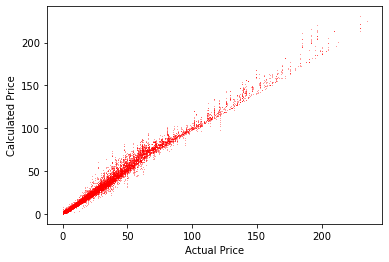

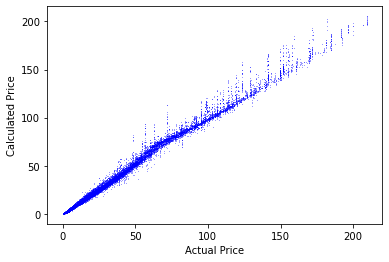

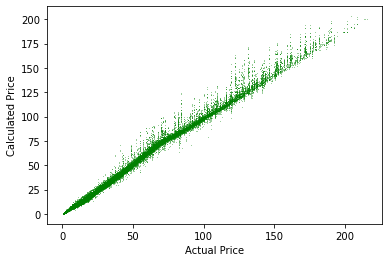

In [14]:
x1=df_S[' [C_LAST]']
y1=df_S['Call_MLP']
x2=df_M[' [C_LAST]']
y2=df_M['Call_MLP']
x3=df_L[' [C_LAST]']
y3=df_L['Call_MLP']
plt.scatter(x1, y1,color='red',linewidth=0.2,alpha=0.5, s=0.5, label='S')
plt.xlabel('Actual Price')
plt.ylabel('Calculated Price') 
plt.show()
plt.scatter(x2, y2,color='blue',linewidth=0.2,alpha=0.5, s=0.5, label='M')
plt.xlabel('Actual Price')
plt.ylabel('Calculated Price') 
plt.show()
plt.scatter(x3, y3,color='green',linewidth=0.2,alpha=0.5, s=0.5, label='L')
plt.xlabel('Actual Price')
plt.ylabel('Calculated Price') 
plt.show()


In [15]:
df=pd.read_csv('LSTM Put test FINAL Results.csv')
df

,[UNDERLYING_LAST],[DTE],[STRIKE],[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],Put_BS,Put_LSTM
0,194.19,1.597370,155.0,9.31,-0.21728,0.00458,0.71246,-0.01784,-0.82469,0.25979,6.751424,10.223564
1,194.19,1.597370,160.0,10.60,-0.24403,0.00499,0.75959,-0.01922,-0.93018,0.25462,7.759016,11.630687
2,194.19,1.597370,165.0,11.85,-0.27321,0.00539,0.80422,-0.01951,-1.04431,0.24932,8.862789,13.089265
3,194.19,1.597370,170.0,14.00,-0.30350,0.00573,0.84444,-0.02100,-1.16709,0.24518,10.166727,14.684264
4,194.19,1.597370,175.0,15.53,-0.33531,0.00607,0.87844,-0.02109,-1.29530,0.23976,11.495512,16.382809
...,...,...,...,...,...,...,...,...,...,...,...,...
72535,293.20,2.060274,350.0,80.38,-0.69845,0.00415,1.41879,-0.02242,-5.75046,0.19411,59.202701,71.422640
72536,293.20,2.060274,360.0,82.05,-0.74304,0.00396,1.30360,-0.02135,-6.15503,0.18650,65.179230,84.157390
72537,293.20,2.060274,370.0,111.23,-0.78759,0.00361,1.15885,-0.01832,-6.57983,0.17749,71.388575,95.956640
72538,293.20,2.060274,380.0,97.00,-0.83230,0.00330,0.98488,-0.01639,-7.00828,0.16808,78.021552,105.336150


In [16]:
df_S=df[df[' [DTE]']<0.1]

In [18]:
y_true=df_S[' [P_LAST]']
y_pred=df_S['Put_LSTM']
print('MAE = ', mean_absolute_error(y_true, y_pred))
print('MSE = ', mean_squared_error(y_true, y_pred))
print('RMSE = ', mean_squared_error(y_true, y_pred, squared=False))

MAE =  1.1607071005913898
MSE =  3.985826876772816
RMSE =  1.996453574910475


In [19]:
df_M=df[df[' [DTE]'].between(0.1,0.5)]

In [20]:
y_true=df_M[' [P_LAST]']
y_pred=df_M['Put_LSTM']
print('MAE = ', mean_absolute_error(y_true, y_pred))
print('MSE = ', mean_squared_error(y_true, y_pred))
print('RMSE = ', mean_squared_error(y_true, y_pred, squared=False))

MAE =  1.3366863619064229
MSE =  5.130962422936842
RMSE =  2.2651627806709262


In [21]:
df_L=df[df[' [DTE]']>0.5]

In [22]:
y_true=df_L[' [P_LAST]']
y_pred=df_L['Put_LSTM']
print('MAE = ', mean_absolute_error(y_true, y_pred))
print('MSE = ', mean_squared_error(y_true, y_pred))
print('RMSE = ', mean_squared_error(y_true, y_pred, squared=False))

MAE =  1.6896574775084778
MSE =  13.5041666795413
RMSE =  3.6748015836969077


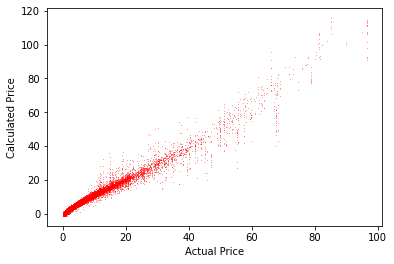

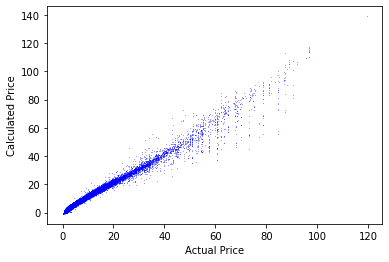

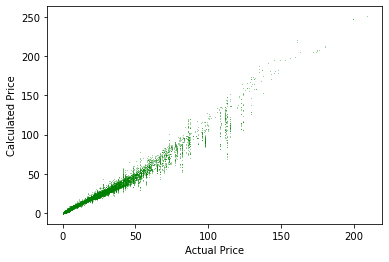

In [23]:
x1=df_S[' [P_LAST]']
y1=df_S['Put_LSTM']
x2=df_M[' [P_LAST]']
y2=df_M['Put_LSTM']
x3=df_L[' [P_LAST]']
y3=df_L['Put_LSTM']
plt.scatter(x1, y1,color='red',linewidth=0.2,alpha=0.5, s=0.5, label='S')
plt.xlabel('Actual Price')
plt.ylabel('Calculated Price') 
plt.show()
plt.scatter(x2, y2,color='blue',linewidth=0.2,alpha=0.5, s=0.5, label='M')
plt.xlabel('Actual Price')
plt.ylabel('Calculated Price') 
plt.show()
plt.scatter(x3, y3,color='green',linewidth=0.2,alpha=0.5, s=0.5, label='L')
plt.xlabel('Actual Price')
plt.ylabel('Calculated Price') 
plt.show()
